In [12]:
import time
from citipy import citipy

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

import requests
import json
from config import ow_api_key as api_key

In [13]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

### Generate random cities

In [50]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

coord_list = []
cities = []

In [51]:
# Create a set of random lat and lng combinations
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)
long = np.random.uniform(lng_range[0], lng_range[1], size=1500)
coord_list = list(zip(lat, long))

In [52]:
# Identify nearest city for each lat, lng combination
for coord in coord_list:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    if city not in cities:
        cities.append(city)

In [53]:
len(cities)

603

### Query API for Cities

In [90]:
base_url = f'https://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q='
temp = []
humidity = [] 
cloudiness = []
wind = []
city = []
latitude = []
record = 1
for c in cities[13:20]:
    query_url = f'{base_url}{c}'
    response = requests.get(query_url).json()
    try:
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city.append(c)
        latitude.append(response['coord']['lat'])
        print(f"Processing record # {record} for {c}")
    except:
        print(f'{c} not found, skipping...')
    record += 1
    time.sleep(1)

Processing record # 1 for viking
Processing record # 2 for rikitea
Processing record # 3 for butaritari
Processing record # 4 for chikwawa
Processing record # 5 for saskylakh
Processing record # 6 for garden city
Processing record # 7 for bodden town


In [91]:
weather_dict = {"city":city,
                "latitude" : latitude,
                "temperature" : temp,
                "humidity": humidity,
                "cloudiness" : cloudiness,
                "wind speed" : wind
}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()


,city,latitude,temperature,humidity,cloudiness,wind speed
0,viking,53.1001,69.62,55,54,6.60
1,rikitea,-23.1203,75.34,74,83,12.82
2,butaritari,3.0707,82.18,74,11,19.37
3,chikwawa,-16.0335,64.51,92,54,3.09
4,saskylakh,71.9167,67.87,80,33,5.37


In [97]:
weather_df.describe()

,latitude,temperature,humidity,cloudiness,wind speed
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,21.506086,76.207143,69.428571,42.142857,9.547143
std,35.866426,9.362830,16.184943,24.148351,5.412897
min,-23.120300,64.510000,43.000000,11.000000,3.090000
25%,-6.481400,68.745000,61.500000,26.500000,5.985000
50%,19.283300,75.340000,74.000000,40.000000,9.220000
75%,47.712850,83.550000,77.000000,54.000000,11.590000
max,71.916700,89.010000,92.000000,83.000000,19.370000


In [96]:
weather_df.loc[weather_df["humidity"]>100,:]

,city,latitude,temperature,humidity,cloudiness,wind speed


In [99]:
# write cleaned data to csv
weather_df.to_csv(output_data_file,index=False)

### Scatter Plots

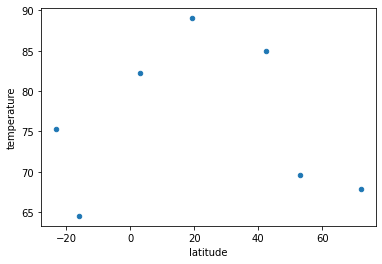

In [92]:
# Temperature (F) vs. Latitude
weather_df.plot(x="latitude",y="temperature",kind="scatter")
plt.show()

explanation

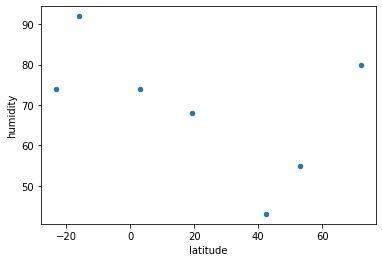

In [93]:
# Humidity (%) vs. Latitude
weather_df.plot(x="latitude",y="humidity",kind="scatter")
plt.show()

explaination

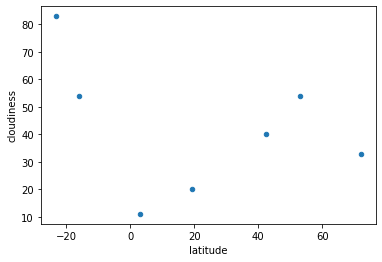

In [94]:
# Cloudiness (%) vs. Latitude
weather_df.plot(x="latitude",y="cloudiness",kind="scatter")
plt.show()

explanation

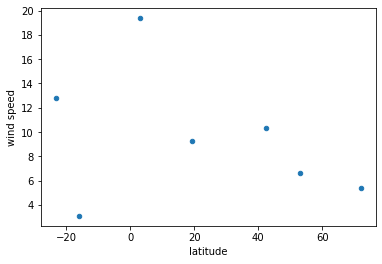

In [95]:
# Wind Speed (mph) vs. Latitude
weather_df.plot(x="latitude",y="wind speed",kind="scatter")
plt.show()

explanation

### Linear Regression

In [ ]:
#Northern Hemisphere - Temperature (F) vs. Latitude

In [ ]:
#Southern Hemisphere - Temperature (F) vs. Latitude

explanation

In [ ]:
#Northern Hemisphere - Humidity (%) vs. Latitude

In [ ]:
#Southern Hemisphere - Humidity (%) vs. Latitude

explanation

In [ ]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude

In [ ]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude

explanation

In [ ]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude

In [ ]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude

explanation